In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from statistics import mean, stdev

In [2]:
# Read data
red_zone_qb_proximity = pd.read_csv('https://storage.googleapis.com/big-data-bowl/redZoneQBProximity.csv')

In [3]:
red_zone_qb_proximity

,gameId,playId,frameId,nflId,officialPosition,nflId2,officialPosition2,matchupOpposing,distance,angle
0,2021090900,410,1,25511.0,QB,35481.0,TE,0,6.035006,139.367813
1,2021090900,410,1,25511.0,QB,35634.0,WR,0,15.799373,169.017225
2,2021090900,410,1,25511.0,QB,40151.0,C,0,4.135855,93.049194
3,2021090900,410,1,25511.0,QB,41233.0,WR,0,9.822464,23.903262
4,2021090900,410,1,25511.0,QB,41263.0,DE,1,8.638154,140.967272
...,...,...,...,...,...,...,...,...,...,...
901354,2021103112,3145,45,45536.0,QB,44867.0,DT,1,7.065104,76.160446
901355,2021103112,3145,45,45536.0,QB,52497.0,CB,1,28.235768,66.076657
901356,2021103112,3145,45,45536.0,QB,47973.0,NT,1,6.023421,59.688787
901357,2021103112,3145,45,45536.0,QB,41235.0,OLB,1,16.500015,79.241692


In [4]:
def pressure_probability(nflId):
    player_pressure = red_zone_qb_proximity[red_zone_qb_proximity['nflId2'] == nflId][['gameId', 'playId', 'distance']].groupby(['gameId', 'playId']).min().reset_index()
    if len(player_pressure) > 5:
        return norm(loc = mean(player_pressure['distance']) , scale = stdev(player_pressure['distance'])).cdf(1)
    else:
        return np.nan

In [5]:
players = red_zone_qb_proximity[red_zone_qb_proximity['matchupOpposing'] == 1][['nflId2', 'officialPosition2']].groupby('nflId2').first().reset_index()
players['pressureProbability'] = players['nflId2'].apply(pressure_probability)

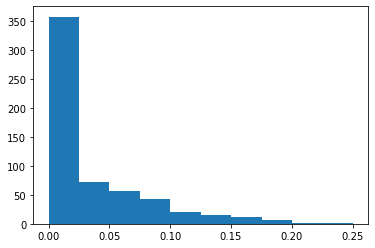

In [6]:
plt.hist(players['pressureProbability'])
plt.show()

In [7]:
players[['officialPosition2', 'pressureProbability']].groupby('officialPosition2').mean().reset_index().sort_values(by='pressureProbability', ascending=False)

,officialPosition2,pressureProbability
2,DE,0.071270
9,OLB,0.067202
3,DT,0.052528
8,NT,0.038692
6,ILB,0.015583
7,MLB,0.011228
11,SS,0.007141
4,FS,0.006541
0,CB,0.002579
1,DB,0.000036
